# I. Input Data
The first thing that we need to do is inputing the data. In order to do that, we need to import the necessary libraries first. These necessary libraries are *numpy* and *pandas*. After the data has been input, we can see to the data to see how we can analyze this, what information that we need the most etc.  

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
items = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/items.csv')
item_categories = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv')
shops = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/shops.csv')
train = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv')

Train dataset is the most important dataset here. This dataset is also the baseline for this project. There are a lot of items in this dataset, we can see it from the *item_id*. But, we need to know what items are these, so we can combine them with *item_category_id* from **item_categories** dataset.

In [3]:
train = train.join(items.drop(['item_name'], axis=1).set_index('item_id'), on='item_id')
train['date'] = pd.to_datetime(train.date)

There are some *item_cnt_day* value that has value less than 0. This is obviously an anomaly so we have to fix this. In order to do that, we will change every values that are less than 0 to be 1. 

In [4]:
anomaly_counts = list(pd.DataFrame(train.item_cnt_day[train.item_cnt_day < 0].value_counts()).index)
train['item_cnt_day'] = train['item_cnt_day'].replace(anomaly_counts, 1)

# II. Exploratory Data Analysis (EDA)
Next step, we want to see how each features affect each others. A little knowledge about this can help us develop a better model. 

In [5]:
def cnt_sum(item_cat):
    cnt_ave = []
    for i in [2013, 2014, 2015]:
        for j in list(range(1, 13)):
            x = new_train.item_cnt_day[(new_train.year == i) & (new_train.month == j) &
                                       (new_train.item_category_id == item_cat)].sum()
            cnt_ave.append(x)
    return cnt_ave

In [6]:
new_train = train
new_train['year'] = [x.year for x in train.date]
new_train['month'] = [x.month for x in train.date]

years = []
months = []

for i in [2013, 2014, 2015]:
    for j in list(range(1, 13)):
        years.append(i)
        months.append(j)

## Item Categories Trend in 2013-2015
Let's see how some categories trend. I picked 5 categories randomly and see how the trend is from the beginning of 2013 to the end of 2015.  

<AxesSubplot:>

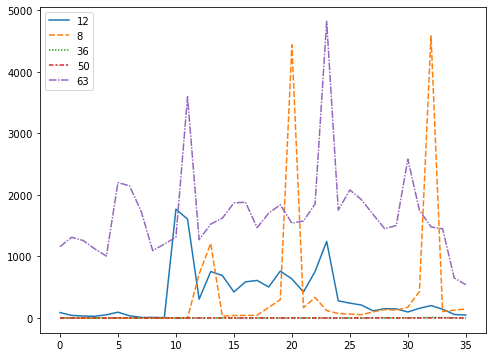

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

df_exm = pd.DataFrame()
df_exm['year'] = years
df_exm['month'] = months

for i in [12, 8, 36, 50, 63]:
    df_exm[str(i)] = cnt_sum(i)

plt.figure(figsize=(8, 6))
sns.lineplot(data=df_exm[['12', '8', '36', '50', '63']])

Then I tried the same thing with another 5 random categories. 

<AxesSubplot:>

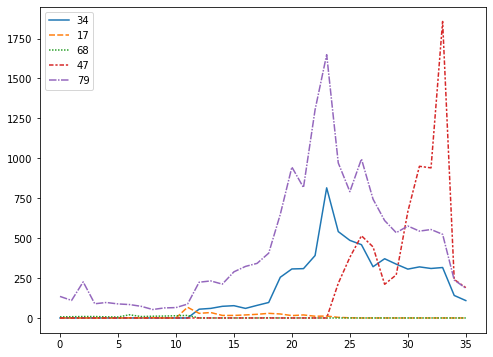

In [8]:
df_exm = pd.DataFrame()
df_exm['year'] = years
df_exm['month'] = months

for i in [34, 17, 68, 47, 79]:
    df_exm[str(i)] = cnt_sum(i)
    
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_exm[['34', '17', '68', '47', '79']])

We can see from two graphs above, there is no similar patterns between categories. Each category have their own trends. Other than that, there are certain categories that has far less demands than others. The categories like this are even harder how the trend goes. 

There are categories that have peak demand each year and there are other categories that only peak once in 3 years. But, from all these categories that are shown in these graphs, there is one similarity. That is the declining sells at the end of the graph, which means there is a declining sells at December 2015. That can happen because of the fact that that's what really happened, or maybe that can also happened because of the incomplete data.  

## Most Expensive Item Categories
We also need to know the price distribution and how price contribute to the sells. 

<AxesSubplot:xlabel='item_category', ylabel='mean_price'>

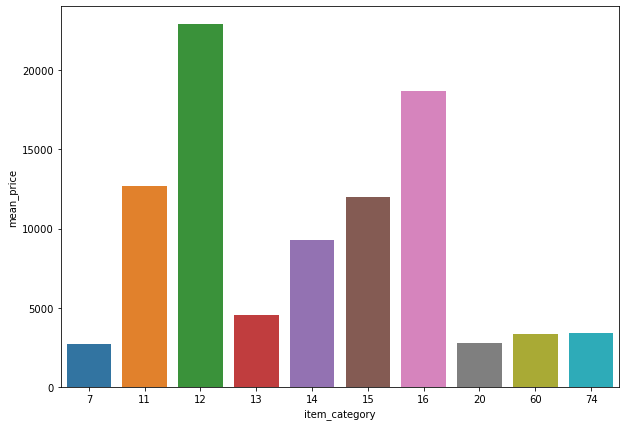

In [9]:
most_exp = pd.DataFrame()
most_exp['item_category'] = item_categories.item_category_id

exp = []
for i in most_exp['item_category']:
    x = train.item_price[train.item_category_id == i].mean()
    exp.append(x)
most_exp['mean_price'] = exp

most_exp = most_exp.sort_values('mean_price', ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(data=most_exp.iloc[:10], x='item_category', y='mean_price')

## Most Sells Item Categories
This is the point of this project. We need to know what item categories that has most sells. 

<AxesSubplot:xlabel='item_category', ylabel='cnt_total'>

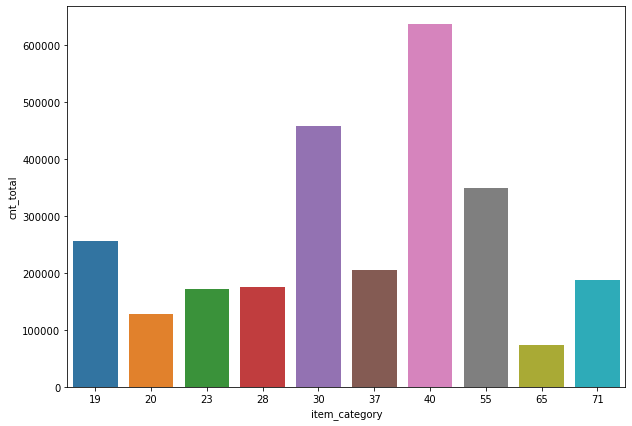

In [10]:
most_bought = pd.DataFrame()
most_bought['item_category'] = item_categories.item_category_id

bought = []
for i in most_bought['item_category']:
    x = train.item_cnt_day[train.item_category_id == i].sum()
    bought.append(x)
most_bought['cnt_total'] = bought

most_bought = most_bought.sort_values('cnt_total', ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(data=most_bought.iloc[:10], x='item_category', y='cnt_total')

## Which Year Has Most Sells?

<AxesSubplot:xlabel='year', ylabel='sells'>

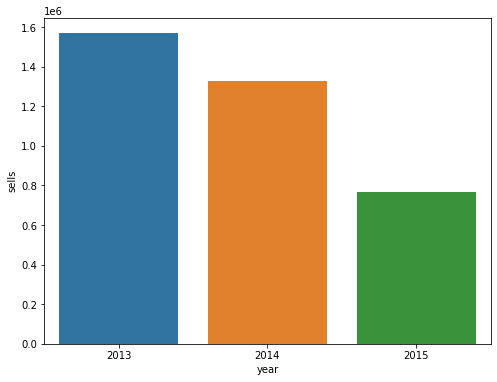

In [11]:
sells_year = pd.DataFrame()
sells_year['year'] = [2013, 2014, 2015]
sells_year['sells'] = [train.item_cnt_day[train.year == x].sum() for x in sells_year['year']]

plt.figure(figsize=(8, 6))
sns.barplot(data=sells_year, x='year', y='sells')

We can see from the plot above, the sells is declining each year, making 2013 as a year with most sells. 

## Months With Most Sells
After seeing how many items were sold each year, maybe we should also know how many items were sold in each month. We will make a graph that shows how many sells each month in respect to each years. 

<AxesSubplot:xlabel='month', ylabel='sells'>

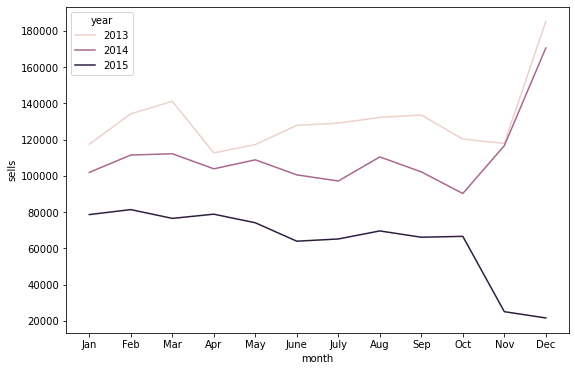

In [12]:
sells_month = pd.DataFrame()

s_year = []
for i in [2013, 2014, 2015]: 
    for j in range(12): s_year.append(i)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug',
          'Sep', 'Oct', 'Nov', 'Dec']
s_months = []
for i in range(3): 
    for j in range(12): s_months.append(months[j]) 
        
sells_month['year'] = s_year
sells_month['month'] = s_months
      
the_sells = []    
for y in [2013, 2014, 2015]:
    x = [train.item_cnt_day[(train.month == x) & (train.year == y)].sum() for x in range(1, 13)]
    for j in x: the_sells.append(j)

sells_month['sells'] = the_sells

plt.figure(figsize=(9, 6))
sns.lineplot(data=sells_month, x='month', y='sells', hue='year')

We can see from the graph, 2013 is the year with most sells followed by 2014 and 2015 respectively. The year 2013 and 2014 almost have the same trend. 

We also see that they all have similarties in October. The sells in November is drastically different from October, either declining like what happened in 2015 or inclining like what happened in 2013 and 2014.  

<Figure size 864x576 with 0 Axes>

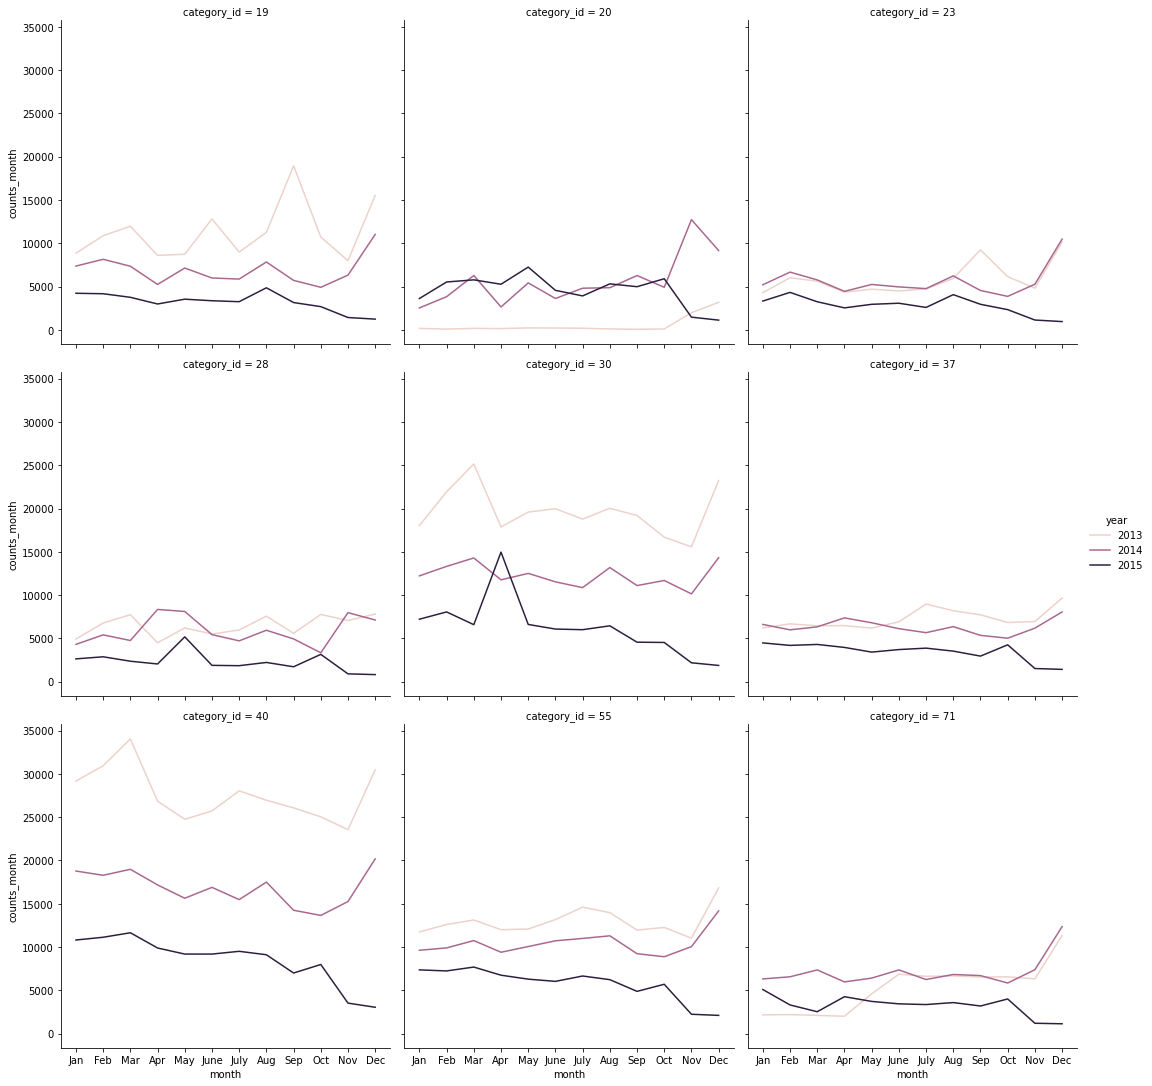

In [13]:
the_categories = list(most_bought.head(9).item_category)
the_months = months
the_years = [2013, 2014, 2015]

counts_input = []
years_input = []
months_input = []
category_input = []

for y in the_years:
    for mm, m in zip(range(1, 13), the_months):
        for c in the_categories:
            the_input = train.item_cnt_day[(train.year == y) &
                                           (train.month == mm) &
                                           (train.item_category_id == c)].sum()
            counts_input.append(the_input)
            years_input.append(y)
            months_input.append(m)
            category_input.append(c)

df_exm_categories = pd.DataFrame()
df_exm_categories['year'] = years_input
df_exm_categories['month'] = months_input
df_exm_categories['category_id'] = category_input
df_exm_categories['counts_month'] = counts_input

plt.figure(figsize=(12, 8))
sns.relplot(data=df_exm_categories, x='month', y='counts_month', hue='year', 
             col='category_id', col_wrap=3, kind='line')

All 9 graphs above showed the sells trend for 9 item categories with most sells. We can see that 8 item categories followed the same trend as all-sells-monthly trend (showed by previous graph). Only *category_id* 20 that has different trend.  

## Shops Monthly Sells in 2013-2015
In this project we will make predictions of how many sells does a shop make for a certain item in the future. Which means *shop_id* is a very important features. It is a necessary to see how a shop related to the sells.  

<Figure size 864x576 with 0 Axes>

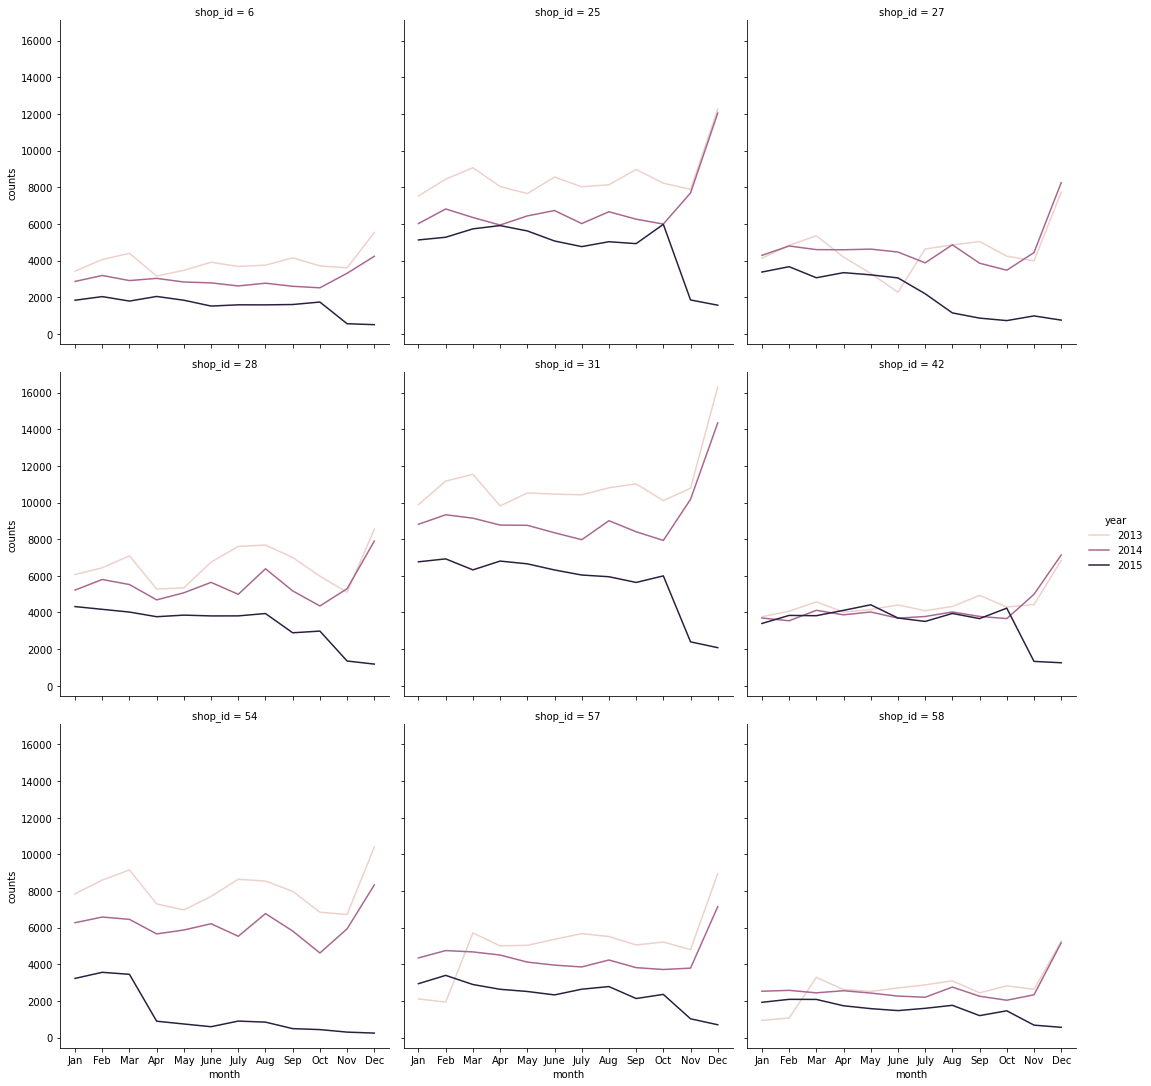

In [14]:
shops_counts = pd.DataFrame()
shops_counts['shop_id'] = shops.shop_id
shops_counts['counts'] = [train.item_cnt_day[train.shop_id == x].sum() for x in shops.shop_id]
best_shops = list(shops_counts.sort_values('counts', ascending=False).head(9).shop_id)

counts_input = []
years_input = []
months_input = []
shops_input = []

for y in the_years:
    for mm, m in zip(range(1, 13), the_months):
        for s in best_shops:
            the_input = train.item_cnt_day[(train.year == y) &
                                           (train.month == mm) &
                                           (train.shop_id == s)].sum()
            counts_input.append(the_input)
            years_input.append(y)
            months_input.append(m)
            shops_input.append(s)

df_exm_shops = pd.DataFrame()
df_exm_shops['year'] = years_input
df_exm_shops['month'] = months_input
df_exm_shops['shop_id'] = shops_input
df_exm_shops['counts'] = counts_input

plt.figure(figsize=(12, 8))
sns.relplot(data=df_exm_shops, x='month', y='counts', hue='year',
            col='shop_id', col_wrap=3, kind='line')

As we see with what happened in item categories, the sells have a trend. That also happened to the shops. There is a trend applied to each shops. We can see form 9 most popular shops above, almost all of it have a same common trend, which also applied to total-sells trend.  

# II. Building the Model
After exploring the data using our visualizations, the next step is building a model that will be able to predict how the market work in the future. In order to build such models, we need to prepare data for training and validation. So, we need to split the train data. 

In [15]:
x = train[['item_id', 'shop_id', 'year', 'month', 'item_category_id']]
y = train['item_cnt_day']

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
import xgboost as xgb

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

To ease the memory up during training, the data that we already used and won't use later need to be deleted.  

In [17]:
del items
del item_categories
del shops
del anomaly_counts
del new_train
del df_exm
del most_exp
del most_bought
del sells_year
del sells_month
del the_sells
del the_categories
del the_months
del the_years
del counts_input
del years_input
del months_input
del category_input
del df_exm_categories
del shops_counts
del best_shops
del df_exm_shops

## What Models?
In this project we decided to compare two set of models that use two different methods. Actually, both of these methods have similarity, which is they are both **ensemble** method. Ensemble method is a machine learning model that uses the results of many models prediction to generate one prediction. This method is developed from **decision tree** which means ensemble method uses many decision tree to generate predictions.

There are two types of ensemble methods:
1. Bagging (Bootstrap Aggregating) which is an ensemble method that uses many decision trees that are trained at the same time. They only trained with different set of training data. the example of this method is **random forest**.
2. Boosting which is an ensemble method that uses decision trees that work gradually. There is only one decision tree that is trained one at a time. The next decision tree that will be trained will use the result of the previous decision tree result in the training dataset. The example of boosting models are AdaBoost, gradient boost and extreme gradient boost.  

## Bagging - Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

estimator_rf = RandomForestClassifier(random_state=42, max_depth=10, n_estimators=400,
                                      max_samples=0.15, max_leaf_nodes=5)
estimator_rf.fit(x_train, y_train)
rf_prediction = estimator_rf.predict(x_test)
rf_pred_score = accuracy_score(y_test, rf_prediction)

## Boosting - AdaBoost

In [19]:
estimator_ab = AdaBoostClassifier(n_estimators=100, learning_rate=0.05)
estimator_ab.fit(x_train, y_train)
ab_prediction = estimator_ab.predict(x_test)
ab_pred_score = accuracy_score(y_test, ab_prediction)

## Validation Results

In [20]:
print('Random Forest Prediction:', rf_pred_score)
print('Ada Boost Prediction:', ab_pred_score)

Random Forest Prediction: 0.8980363438186556
Ada Boost Prediction: 0.8980363438186556


We can see from the result, they both have the same results. The similarity is very precise. If we have to make a guess, this was caused by the exact same results that these two models made while predicting the validation data.

This means we can choose any model that we want to use disregarding the accuracy (because both of these two models have the same accuracy).

# III. Prediction

In [21]:
test = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/test.csv')
items = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/items.csv')

In [22]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [23]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [24]:
the_id = test.ID

In [25]:
test = test.join(items.drop(['item_name'], axis=1).set_index('item_id'), on='item_id')
test['year'] = np.full(len(test), 2016)
test['month'] = np.full(len(test), 1)

old_test = test
test = test[['item_id', 'shop_id', 'year', 'month', 'item_category_id']]

In [26]:
prediction = estimator_ab.predict(test)

In [27]:
submission = pd.DataFrame()
submission['ID'] = the_id  
submission['item_cnt_month'] = prediction 

submission.to_csv('future_sales_pred.csv', index=False)